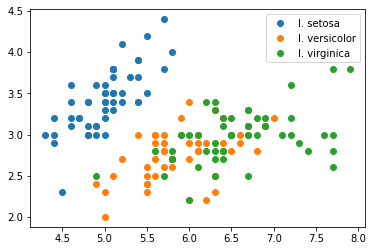

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder()
from sklearn.cluster import MeanShift, estimate_bandwidth

df = pd.read_csv('../data/iris_data.csv', decimal=',')
df = df.drop(columns=['Petal length', 'Petal width'])

groups = df.groupby("Species")

for name, group in groups:
    plt.plot(group["Sepal length"], group["Sepal width"], marker="o", linestyle="", label=name)
plt.legend()


Number of estimated clusters : 3


Text(0.5, 1.0, 'Estimated number of clusters: 3')

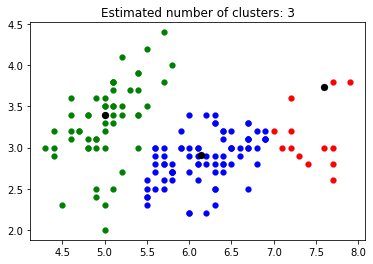

In [120]:
def mean_shift(data, n_samples=149):
    bandwidth = estimate_bandwidth(data, quantile=0.25, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

df_without_species = df.drop(columns='Species')
data_2d = df_without_species.values

labels, cluster_centers, n_clusters = mean_shift(data_2d)

# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))